# 导入数据

In [2]:
import pandas as pd

data = pd.read_csv("../../dataset/rumor_preprocessed.csv")
data.drop(columns="Unnamed: 0", inplace=True)
data


,微博数,关注数,粉丝数,introduction,是否认证,点赞数,评论数,是否包含特殊符号,sentiment,negative_prob,abnormal
0,519,443,83,1,0,0,0,0,-0.999378,0.999720,0
1,7642,473,148000,1,1,3,0,0,-0.747381,0.886322,0
2,42534,527,240,0,0,0,0,0,-0.999944,0.999975,0
3,52954,748,3406000,1,1,0,0,1,-0.496222,0.773300,0
4,23797,1201,152,1,0,0,0,0,-0.999046,0.999571,0
...,...,...,...,...,...,...,...,...,...,...,...
3141,1350,63,102,1,0,3,0,1,-0.956153,0.980269,1
3142,4170,1025,874,1,1,0,4,1,0.730792,0.121144,1
3143,15,2420,94,1,0,0,0,0,0.000000,0.475700,1
3144,342,277,105,1,0,0,0,1,0.232050,0.345578,1


# 可视化1

d:\miniconda3\envs\dataanalysis\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


d:\miniconda3\envs\dataanalysis\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
d:\miniconda3\envs\dataanalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


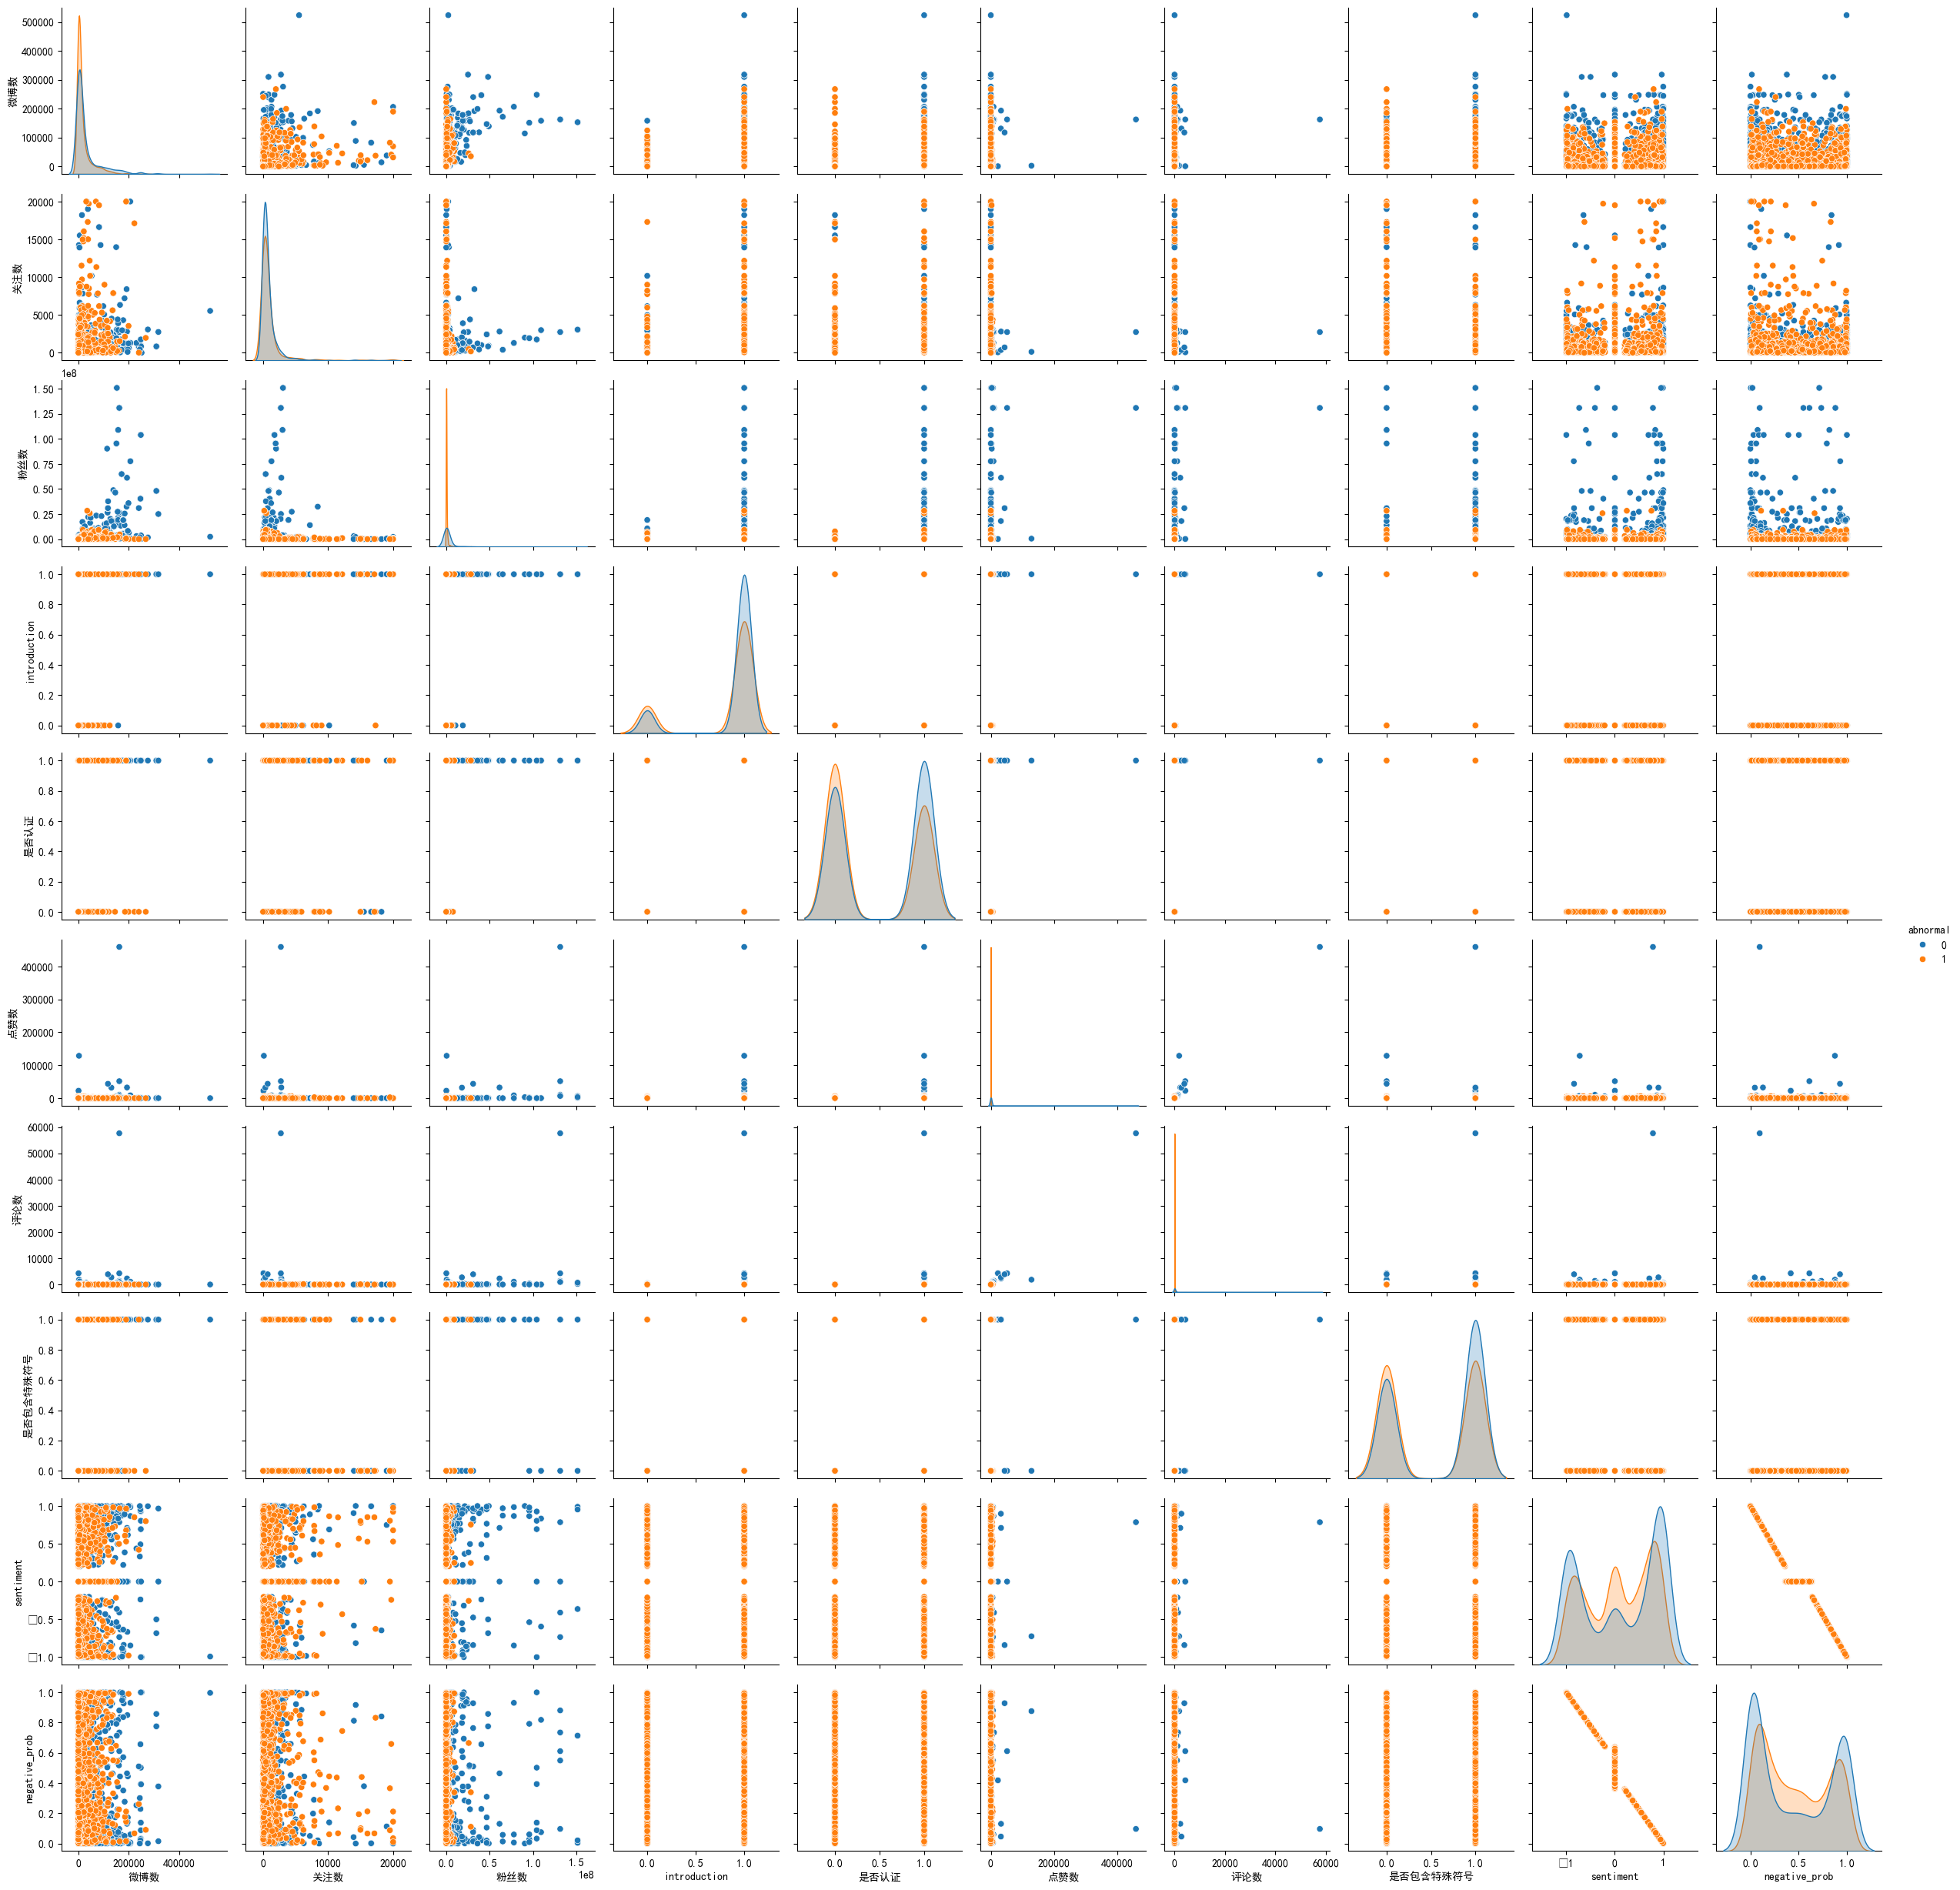

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]
sns.pairplot(data=data, hue="abnormal")

# 3D

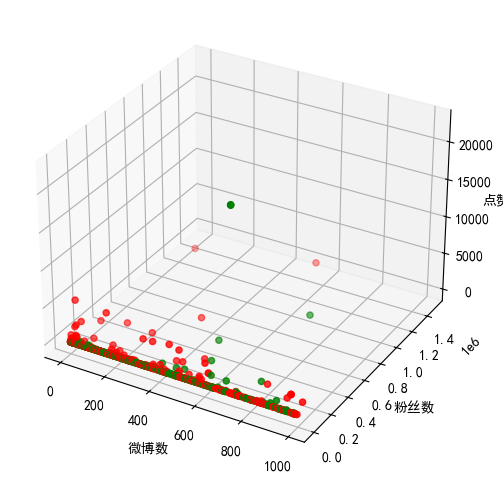

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
plt.rcParams["font.sans-serif"] = ["SimHei"]

plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
tdata = data[data["粉丝数"] < 100]
tdata = data[data["微博数"] < 1000]
ax.scatter3D(tdata["微博数"], tdata["粉丝数"], tdata["点赞数"], c=tdata["abnormal"].map(lambda x: "r" if x else "g"))
ax.set_xlabel("微博数")
ax.set_ylabel("粉丝数")
ax.set_zlabel("点赞数")
plt.show()

# abnormal相关性分析

In [16]:
tdata = data.copy()
corrs = pd.DataFrame()

corrs["pearson"] = tdata.corr(method="pearson")["abnormal"]
corrs["kendall"] = tdata.corr(method="kendall")["abnormal"]
corrs["spearman"] = tdata.corr(method="spearman")["abnormal"]
corrs.drop(index="abnormal", inplace=True)
corrs

,pearson,kendall,spearman
微博数,-0.137194,-0.083389,-0.102099
关注数,0.026598,-0.033763,-0.041323
粉丝数,-0.150677,-0.075877,-0.092849
introduction,-0.096065,-0.096065,-0.096065
是否认证,-0.121889,-0.121889,-0.121889
点赞数,-0.028613,-0.179174,-0.205198
评论数,-0.028299,-0.078506,-0.087851
是否包含特殊符号,-0.105167,-0.105167,-0.105167
sentiment,-0.022619,-0.049997,-0.060626
negative_prob,0.018570,0.048832,0.059795


In [25]:
from sklearn.preprocessing import StandardScaler

features = data.drop(columns="abnormal")
target = data["abnormal"]


scalar = StandardScaler()
scalar.fit(features)
features = scalar.transform(features)

tdata = pd.DataFrame(features)
tdata["abnormal"] = target

corrs = pd.DataFrame()

corrs["pearson"] = tdata.corr(method="pearson")["abnormal"]
corrs["kendall"] = tdata.corr(method="kendall")["abnormal"]
corrs["spearman"] = tdata.corr(method="spearman")["abnormal"]
corrs

,pearson,kendall,spearman
0,-0.137194,-0.083389,-0.102099
1,0.026598,-0.033763,-0.041323
2,-0.150677,-0.075877,-0.092849
3,-0.096065,-0.096065,-0.096065
4,-0.121889,-0.121889,-0.121889
5,-0.028613,-0.179174,-0.205198
6,-0.028299,-0.078506,-0.087851
7,-0.105167,-0.105167,-0.105167
8,-0.022619,-0.049997,-0.060626
9,0.018570,0.048832,0.059795
